From this example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score, n_jobs=32)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model 

In [2]:
print(*[el for el in dir(clf) if not el.startswith('_')], sep='\n')

best_estimator_
best_index_
best_params_
best_score_
cv
cv_results_
decision_function
error_score
estimator
fit
fit_params
get_params
grid_scores_
iid
inverse_transform
n_jobs
n_splits_
param_grid
pre_dispatch
predict
predict_log_proba
predict_proba
refit
return_train_score
score
scorer_
scoring
set_params
transform
verbose


In [3]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
clf.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [5]:
clf.best_score_

0.98666743650142419

In [6]:
clf.best_index_

2

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.DataFrame(clf.cv_results_)
df.head() 

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.098378,0.026062,0.985638,0.998865,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",4,0.994737,...,0.968254,0.998571,0.982868,0.998592,0.994444,0.998592,0.006703,0.005756,0.009734,0.000567
1,0.097128,0.027311,0.956672,0.966826,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",12,0.978036,...,0.944643,0.962256,0.936569,0.977341,0.964257,0.967236,0.016530,0.000867,0.014652,0.005524
2,0.150833,0.021110,0.986667,1.000000,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",1,0.994737,...,0.968254,1.000000,0.988750,1.000000,0.993750,1.000000,0.032920,0.002770,0.009581,0.000000
3,0.064166,0.016970,0.980697,0.997969,10,0.0001,rbf,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",7,0.994118,...,0.962698,0.997056,0.970368,0.998592,1.000000,0.998592,0.010399,0.002375,0.014117,0.000755
4,0.101893,0.023012,0.986667,1.000000,100,0.001,rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",1,0.994737,...,0.968254,1.000000,0.988750,1.000000,0.993750,1.000000,0.015959,0.001270,0.009581,0.000000


In [9]:
print(*df.columns, sep='\n')

mean_fit_time
mean_score_time
mean_test_score
mean_train_score
param_C
param_gamma
param_kernel
params
rank_test_score
split0_test_score
split0_train_score
split1_test_score
split1_train_score
split2_test_score
split2_train_score
split3_test_score
split3_train_score
split4_test_score
split4_train_score
std_fit_time
std_score_time
std_test_score
std_train_score


In [10]:
dft = df[['mean_test_score', 'param_C', 'param_gamma', 'param_kernel']]
dft

,mean_test_score,param_C,param_gamma,param_kernel
0,0.985638,1,0.001,rbf
1,0.956672,1,0.0001,rbf
2,0.986667,10,0.001,rbf
3,0.980697,10,0.0001,rbf
4,0.986667,100,0.001,rbf
5,0.980894,100,0.0001,rbf
6,0.986667,1000,0.001,rbf
7,0.980894,1000,0.0001,rbf
8,0.972361,1,NaN,linear
9,0.972361,10,NaN,linear


In [11]:
dft = dft[dft.param_kernel == 'rbf']
dft

,mean_test_score,param_C,param_gamma,param_kernel
0,0.985638,1,0.001,rbf
1,0.956672,1,0.0001,rbf
2,0.986667,10,0.001,rbf
3,0.980697,10,0.0001,rbf
4,0.986667,100,0.001,rbf
5,0.980894,100,0.0001,rbf
6,0.986667,1000,0.001,rbf
7,0.980894,1000,0.0001,rbf


In [12]:
c_unique = dft.param_C.unique() 

In [13]:
gamma_unique = dft.param_gamma.unique() 

In [14]:
arr = np.zeros((c_unique.size, gamma_unique.size))
for i, c in enumerate(c_unique):
    for j, gamma in enumerate(gamma_unique):
        arr[i, j] = dft[(dft.param_C == c) & (dft.param_gamma == gamma)].mean_test_score


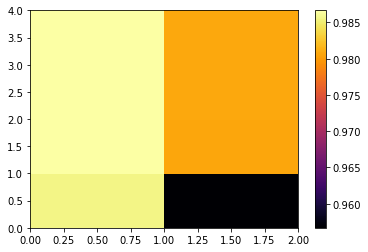

In [15]:
fig, ax = plt.subplots()
pc = ax.pcolor(arr, cmap='inferno')
fig.colorbar(pc)

In [16]:
clf.cv_results_

{'mean_fit_time': array([ 0.09837832,  0.09712806,  0.15083303,  0.06416626,  0.10189257,
         0.05099802,  0.09669466,  0.04511714,  0.03015385,  0.02785244,
         0.03280153,  0.03216224]),
 'mean_score_time': array([ 0.02606215,  0.02731051,  0.02111034,  0.01696982,  0.0230124 ,
         0.01741247,  0.01973443,  0.01487732,  0.0080709 ,  0.00889797,
         0.00970469,  0.00940337]),
 'mean_test_score': array([ 0.98563755,  0.95667153,  0.98666744,  0.98069693,  0.98666744,
         0.98089412,  0.98666744,  0.98089412,  0.97236116,  0.97236116,
         0.97236116,  0.97236116]),
 'mean_train_score': array([ 0.99886519,  0.9668263 ,  1.        ,  0.99796875,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ]),
 'param_C': masked_array(data = [1 1 10 10 100 100 1000 1000 1 10 100 1000],
              mask = [False False False False False False False False False False False False],
        fill_value = ?),

In [17]:
for par, mts in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):
    print(par, mts)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} 0.985637551645
{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'} 0.956671525778
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} 0.986667436501
{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'} 0.980696929477
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'} 0.986667436501
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'} 0.980894122165
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'} 0.986667436501
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'} 0.980894122165
{'C': 1, 'kernel': 'linear'} 0.97236116091
{'C': 10, 'kernel': 'linear'} 0.97236116091
{'C': 100, 'kernel': 'linear'} 0.97236116091
{'C': 1000, 'kernel': 'linear'} 0.97236116091


In [18]:
from collections import defaultdict

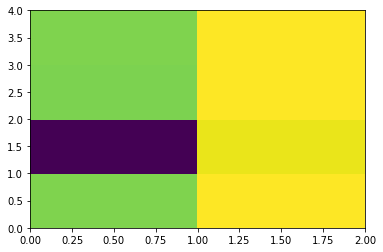

In [28]:
plt.pcolor(plotGridsearchCrossVal(clf, ['C', 'gamma'], paramfilter={'kernel': 'linear'}))

In [114]:
def gridsearch2dataframe(clf, score='mean_test_score'):
    df = pd.DataFrame(clf.cv_results_)
    toDrop = set(df.columns) - {k for k in df.columns if k.startswith('param_')} - {score}
    df = df.drop(toDrop, axis=1)
    return df

In [101]:
df = gridsearch2dataframe(clf)

In [112]:
def heatmapFromGridsearchDf(df, **kwargs):
    kwargs.setdefault('cmap', 'YlGnBu_r')
    dfp = df[df.param_kernel == 'rbf'].drop('param_kernel', axis=1)
    dfp = dfp.set_index([el for el in dfp.columns if el.startswith('param_')]).unstack() 
    ax = sns.heatmap(dfp, xticklabels=dfp.columns.levels[1], **kwargs) 
    ax.set_xlabel(ax.get_xlabel().split('_')[-1])
    ax.set_ylabel(ax.get_ylabel().split('_')[-1])
    return plt.gcf(), ax

(<matplotlib.figure.Figure at 0x7fbe0ca9f860>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbe0c9f5dd8>)

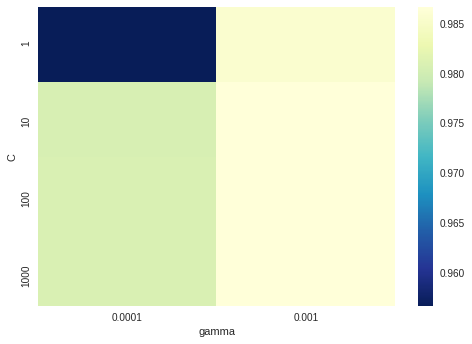

In [113]:
heatmapFromGridsearchDf(df)